In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/iot_dataset_final.csv")

In [ ]:
data.head()

,Unnamed: 0,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.540470e+09,192.168.1.132,0.003497,0,0,0.0,5.0,212.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1.540470e+09,192.168.1.132,0.036724,34,311,0.0,1.0,62.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.540469e+09,192.168.1.132,384.518261,15072,0,0.0,48.0,16416.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.540470e+09,192.168.1.132,0.270332,48,48,0.0,1.0,76.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1.540470e+09,192.168.1.132,0.111429,48,48,0.0,1.0,76.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data.shape

(961348, 28)

In [ ]:
data.columns

Index(['Unnamed: 0', 'ts', 'id.orig_h', 'duration', 'orig_bytes', 'resp_bytes',
       'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp',
       'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
       'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
       'conn_state_SF', 'conn_state_SH', 'conn_state_SHR'],
      dtype='object')

In [ ]:
data.dtypes

,0
Unnamed: 0,int64
ts,float64
id.orig_h,object
duration,float64
orig_bytes,int64
resp_bytes,int64
missed_bytes,float64
orig_pkts,float64
orig_ip_bytes,float64
resp_pkts,float64


In [ ]:
columns_to_remove = ['ts', 'uid', 'id.orig_h', 'local_orig', 'local_resp', 'missed_bytes', 'tunnel_parents']
df = data.drop(columns=columns_to_remove, errors='ignore')

In [ ]:
missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 proto_tcp            1
proto_udp            1
conn_state_OTH       1
conn_state_REJ       1
conn_state_RSTO      1
conn_state_RSTOS0    1
conn_state_RSTR      1
conn_state_RSTRH     1
conn_state_S0        1
conn_state_S1        1
conn_state_S2        1
conn_state_S3        1
conn_state_SF        1
conn_state_SH        1
conn_state_SHR       1
dtype: int64


In [ ]:
X = df.drop(columns=['label', 'Unnamed: 0'])
y = df['label']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['label'])], axis=1)

In [ ]:
attacks_to_remove = ['C&C', 'C&C-HeartBeat', 'C&C-Torii', 'C&C-FileDownload',
                     'C&C-HeartBeat-FileDownload', 'C&C-Mirai', 'FileDownload','Okiru','-   Benign   -']

df_filtered = df[~df['label'].isin(attacks_to_remove)]

In [ ]:
print("Original dataset shape:", df.shape)
print("Filtered dataset shape:", df_filtered.shape)

Original dataset shape: (961348, 25)
Filtered dataset shape: (645541, 25)


In [ ]:
df_filtered.label.unique()

array(['Benign', 'PartOfAHorizontalPortScan', 'DDoS', 'Attack'],
      dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

In [ ]:
X = df_filtered.drop(columns=['label'])
y = df_filtered['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[  1170      3      0      1]
 [     0  13685      0   1319]
 [     0      0   8548   3258]
 [     1   1060   2965 161653]]

Classification Report:
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      1174
                   Benign       0.93      0.91      0.92     15004
                     DDoS       0.74      0.72      0.73     11806
PartOfAHorizontalPortScan       0.97      0.98      0.97    165679

                 accuracy                           0.96    193663
                macro avg       0.91      0.90      0.91    193663
             weighted avg       0.96      0.96      0.96    193663


Accuracy Score: 0.9555568177710766


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [ ]:
print("Missing values in X_train:", np.isnan(X_train_scaled).sum())
print("Missing values in X_test:", np.isnan(X_test_scaled).sum())

Missing values in X_train: 0
Missing values in X_test: 15


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_test_scaled = imputer.fit_transform(X_test_scaled)

In [ ]:
print("Missing values in X_test after imputation:", np.isnan(X_test_scaled).sum())

Missing values in X_test after imputation: 0


In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
scaler = MinMaxScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
selector = SelectKBest(chi2, k=10)
X_train_selected = selector.fit_transform(X_train_pca_scaled, y_train)

In [ ]:
X_test_selected = selector.transform(X_test_pca_scaled)

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0]}, scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'alpha': 0.01}
Accuracy: 0.8546344561572005


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                            precision    recall  f1-score   support

                   Attack       0.00      0.00      0.00       783
                   Benign       0.00      0.00      0.00     10042
                     DDoS       0.00      0.00      0.00      7943
PartOfAHorizontalPortScan       0.85      1.00      0.92    110341

                 accuracy                           0.85    129109
                macro avg       0.21      0.25      0.23    129109
             weighted avg       0.73      0.85      0.79    129109


Confusion Matrix:
 [[     0      0      0    783]
 [     0      0      0  10042]
 [     0      0      0   7943]
 [     0      0      0 110341]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_test_scaled = imputer.fit_transform(X_test_scaled)

In [ ]:
y_pred = knn_clf.predict(X_test_scaled)

In [ ]:
print("KNN Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN Classifier Performance:
Accuracy: 0.9561300916280042

Classification Report:
                            precision    recall  f1-score   support

                   Attack       1.00      0.98      0.99       783
                   Benign       0.99      0.91      0.95     10042
                     DDoS       0.76      0.61      0.68      7943
PartOfAHorizontalPortScan       0.96      0.99      0.97    110341

                 accuracy                           0.96    129109
                macro avg       0.93      0.87      0.90    129109
             weighted avg       0.95      0.96      0.95    129109



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9519216370705814

Classification Report:
                           precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      1174
                   Benign       0.90      0.91      0.91     15004
                     DDoS       0.72      0.74      0.73     11806
PartOfAHorizontalPortScan       0.97      0.97      0.97    165679

                 accuracy                           0.95    193663
                macro avg       0.90      0.90      0.90    193663
             weighted avg       0.95      0.95      0.95    193663



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
svm_clf = SVC(kernel='rbf', C=0.1, cache_size=7000, max_iter=1000, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [ ]:
svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=0.1, cache_size=7000, max_iter=1000, random_state=42)

In [ ]:
y_pred = svm_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8555015671553162


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                            precision    recall  f1-score   support

                   Attack       0.00      0.00      0.00      1174
                   Benign       0.33      0.00      0.00     15004
                     DDoS       0.00      0.00      0.00     11806
PartOfAHorizontalPortScan       0.86      1.00      0.92    165679

                 accuracy                           0.86    193663
                macro avg       0.30      0.25      0.23    193663
             weighted avg       0.76      0.86      0.79    193663



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-1-57359dd79a37>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Algorithm', y='Accuracy', data=df, palette="dark", linewidth=0.8, edgecolor='black', width=0.6)


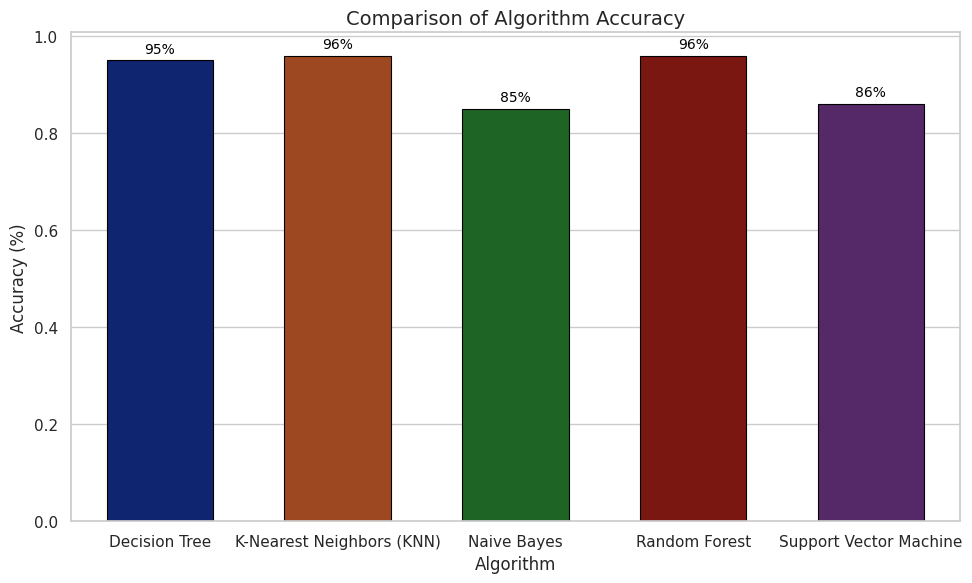

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Algorithm': ['Decision Tree', 'K-Nearest Neighbors (KNN)', 'Naive Bayes', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [0.95, 0.96, 0.85, 0.96, 0.86]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Algorithm', y='Accuracy', data=df, palette="dark", linewidth=0.8, edgecolor='black', width=0.6)

ax.set_xlabel('Algorithm', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Comparison of Algorithm Accuracy', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.0f}%',
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.01),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd

data = {
    'Model': ['Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree'],
    'Precision': [0.96, 0.95, 0.73, 0.76, 0.95],
    'Recall': [0.96, 0.96, 0.85, 0.86, 0.95],
    'F1 Score': [0.96, 0.95, 0.79, 0.79, 0.95],
    'Accuracy': [0.96, 0.96, 0.85, 0.86, 0.95]
}

weights = [0.25, 0.25, 0.25, 0.25]

df = pd.DataFrame(data)
normalized_matrix = df.iloc[:, 1:].div(np.sqrt((df.iloc[:, 1:]**2).sum(axis=0)), axis=1)

weighted_matrix = normalized_matrix * weights

ideal_solution = weighted_matrix.max()
negative_ideal_solution = weighted_matrix.min()

separation_from_ideal = np.sqrt(((weighted_matrix - ideal_solution)**2).sum(axis=1))
separation_from_negative = np.sqrt(((weighted_matrix - negative_ideal_solution)**2).sum(axis=1))

relative_closeness = separation_from_negative / (separation_from_ideal + separation_from_negative)

df['TOPSIS Score'] = relative_closeness

df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

df_sorted = df[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank')

print(df_sorted)


           Model  TOPSIS Score  Rank
0  Random Forest      1.000000   1.0
1            KNN      0.956534   2.0
4  Decision Tree      0.939493   3.0
3            SVM      0.100798   4.0
2    Naive Bayes      0.000000   5.0
